In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1    ZN         506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    int64  
 4    NOX        506 non-null    float64
 5   RM          501 non-null    float64
 6    AGE        506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    int64  
 9   TAX         506 non-null    int64  
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285968,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705119,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20, 15))

## Train-Test split

In [9]:
#import numpy as np

In [10]:
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[: test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# train_set, test_set = split_train_test(housing, 0.2)

In [12]:
# print(f"Rows in train set : {len(train_set)} \nRows in test set : {len(test_set)}\n")

In [13]:
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(housing, test_size=0.2, random_state = 42)
# print(f"Rows in train set : {len(train_set)} \nRows in test set : {len(test_set)}\n")

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [17]:
housing = strat_train_set.copy()
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


## looking for correlations

In [18]:
corr_matrix = housing.corr()

In [19]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV          1.000000
RM            0.679571
B             0.361761
 ZN           0.339741
DIS           0.240451
CHAS          0.205066
 AGE         -0.364596
RAD          -0.374693
CRIM         -0.393715
 NOX         -0.422873
TAX          -0.456657
INDUS        -0.473516
PTRATIO      -0.493534
LSTAT        -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel=' ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel=' ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel=' ZN'>,
        <Axes: xlabel='RM', ylabel=' ZN'>,
        <Axes: xlabel=' ZN', ylabel=' ZN'>,
        <Axes: xlabel='LSTAT', ylabel=' ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel=' ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

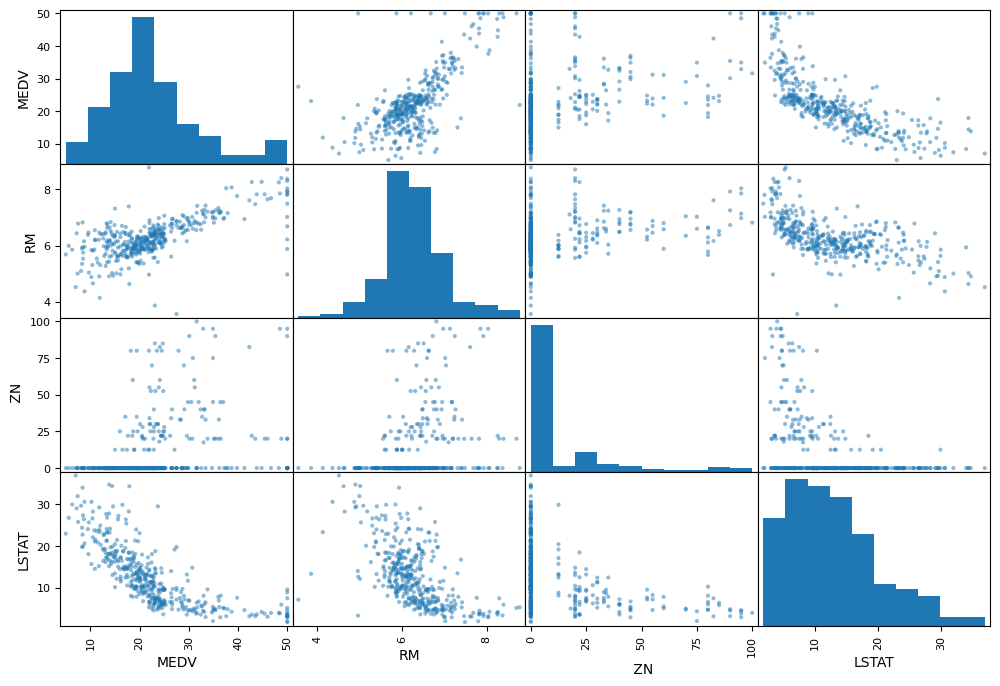

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM"," ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

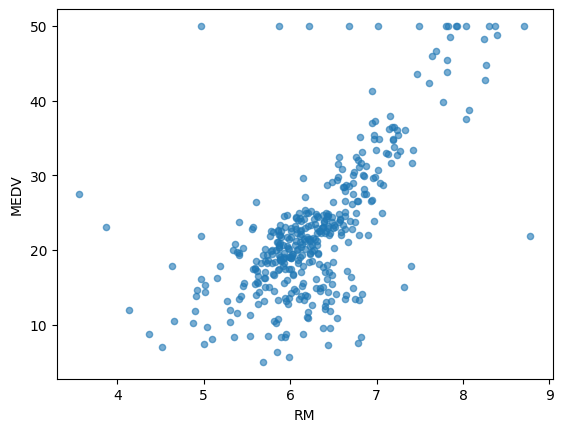

In [21]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.6)

## tryout attribute combination

In [22]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [23]:
housing["TAXRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [25]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV          1.000000
RM            0.679571
B             0.361761
 ZN           0.339741
DIS           0.240451
CHAS          0.205066
 AGE         -0.364596
RAD          -0.374693
CRIM         -0.393715
 NOX         -0.422873
TAX          -0.456657
INDUS        -0.473516
PTRATIO      -0.493534
TAXRM        -0.529138
LSTAT        -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

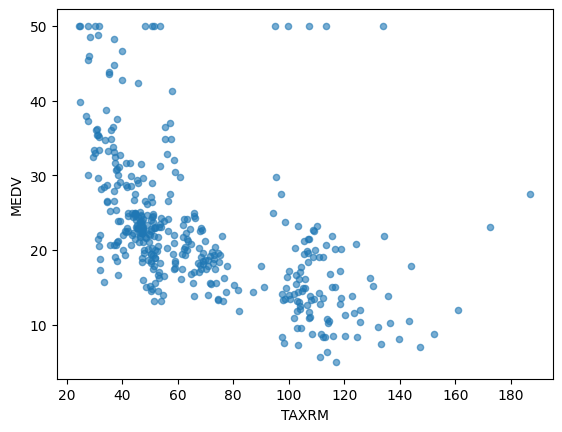

In [26]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.6)

In [27]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## missing attributes

In [28]:
# to take care of missing values, we have three options:
# 1. Get rid of the missing data points
# 2. Get rid of the whole attribute
# 3. Set the value to some vlaue( 0, mean or median)

In [29]:
a = housing.dropna(subset=["RM"]) #option 1 : until we write inplace = True the original data will not be altered.
a.shape

(399, 13)

In [30]:
# housing.drop("RM",axis=1) : option 2 - do not change original data

In [31]:
median = housing["RM"].median()

In [32]:
housing["RM"].fillna(median) # option 3 - do not change original data

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [35]:
X = imputer.transform(housing)


In [36]:
housing_tr = pd.DataFrame(X, columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280651,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711805,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily there are three types of objects:
1. Estimators - it estimates some parameter based on dataset. eg: imputer
                it has a fit method and a transform method.
                Fit method - fits the dataset and calc internal parameters
   
2. Transformers - takes input and returns output based on the learning from fit().It also                    has a convinience function called fit_transform(), which fits and then                    transforms.
   
3. Predictors - Linear Regression is an example of predictor. fit() and predict() are two                 common functions. It also gives score() function which will evaluate the                   prediction.

## Feature scaling

Prmarily there are two types of feature scaling methods:

1. Min-max scaling (Normalization):                                                             => (value-min)/(max-min)                                                                  => sklearn provides a class called MinMaxScaler for this.
   
2. Standardization:                                                                             => (value-mean)/ (std. deviation)                                                         => sklearn provide a class called Standard scaler for this.

 ## creating a pipeline

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
#     Add as many as u want in your pipeline.
    ('std_scaler', StandardScaler()),
])

In [38]:
housing_num_tr = my_pipeline.fit_transform(housing) # it will give a numpy array, because predictors take numpy array as input. 

In [39]:
housing_num_tr.shape

(404, 13)

## selecting a desired model

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [41]:
some_data = housing.iloc[:5]

In [42]:
some_labels = housing_labels.iloc[:5]

In [43]:
prepared_data = my_pipeline.transform(some_data)

In [44]:
model.predict(prepared_data)

array([22.568, 25.478, 16.546, 23.437, 23.493])

In [45]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

## Evaluating the model

In [46]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [47]:
rmse

1.2099109195177615

## using better evaluation technique -  cross validation

In [48]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [49]:
rmse_scores

array([2.7931125 , 2.73333926, 4.33955193, 2.52875811, 3.29588786,
       2.56604081, 4.85567357, 3.33658806, 3.05260418, 3.30935116])

In [50]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation", scores.std())

In [51]:
print_scores(rmse_scores)

Scores: [2.7931125  2.73333926 4.33955193 2.52875811 3.29588786 2.56604081
 4.85567357 3.33658806 3.05260418 3.30935116]
Mean: 3.281090743971067
Standard deviation 0.7260447703460833


### *convert this file into python file and run this pipeline using visual studio code by ur own

## saving the model

In [52]:
from joblib import dump,load
dump(model,"real_estate.joblib")

['real_estate.joblib']

## model testing

In [53]:
x_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(y_test))

[24.732 11.103 25.991 21.771 18.484 15.03  19.979 14.631 32.316 41.187
 19.664 11.607 23.45  26.804 19.773 11.358 31.899 14.037 23.721 18.827
 20.321 17.723 16.969 22.235 17.925 31.643 16.127 32.855  9.224 33.369
 23.529 21.397 22.974 10.452 20.881 11.485 43.16  24.088 24.035 42.356
 23.625 29.814 20.361 20.962 18.173 32.724 45.798 20.068 20.457 22.484
 21.181 14.417 21.234 15.07  25.242 33.011 42.194 29.559 19.011 20.926
 46.655  9.849 19.46  24.845 15.065 33.238 19.187 17.736 19.315 34.508
 26.265 22.668 21.081 22.078 33.988 13.051 15.675 20.393 20.664 21.419
 22.485 21.052 13.601 22.717 20.872 21.134 13.774 21.525 21.524 23.311
 18.606 27.388  7.35  26.246 19.076 28.889 19.921 31.312 14.375 26.458
 21.18  20.656] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [54]:
final_rmse

2.9494801918237687

In [55]:
prepared_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.24285454, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.49843483, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.28603503,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.13411994, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.04409618, -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])

In [56]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24285454, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## using the model

In [57]:
from joblib import dump,load
import numpy as np
model = load("real_estate.joblib")

In [60]:
input = np.array([[-0.43942006,  8.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.84285454, -4.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(input)

array([21.842])